# JSC270 - Class \#1
## Profs. Chevalier and Taback
### 9 Jan 2019

# Today's Class

- What is Data Science?
- Data Science work flows
- Literate programming
- Introduction to exploratory data analysis

# Data Science

**Data:** Data is a plural of datum, which is originally a Latin noun meaning “something given.” Today, data is used in English both as a plural noun meaning “facts or pieces of information” ( These data are described more fully elsewhere) and as a singular mass noun meaning “information”:  Not much data is available on flood control in Brazil [(definition from Dictionary.com)](https://www.dictionary.com/browse/data).

**Science:** systematic knowledge of the physical or material world gained through observation and experimentation [(definition from Dictionary.com)](https://www.dictionary.com/browse/science?s=t).

**The science of learning from data** 

# Data Science vs. Statistics

- Isn't data science just a re-branded version of statistics?
- Isn't statistics applied mathematics?

# Statistical Reasoning

![](poll.png)

# Statistical Reasoning

- How can this scenario be simulated?
- How can this scenario be described mathematically?

>A certain town is served by two hospitals. In the larger hospital about 45 babies are born each day, and in the smaller hospital about 15 babies are born each day. 50% of all babies born are boys. For a period of 1 year, each hospital recorded the days on which more than 60% of the babies born were boys (Tversky, Kahneman, 1974).


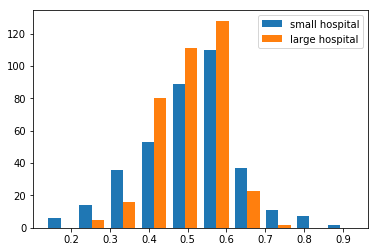

In [7]:
# simulation
import numpy as np
import matplotlib.pyplot as plt

smallH = np.random.binomial(15, 0.5, 365 )/15 #proportion of boys in small hosp
largeH = np.random.binomial(45, 0.5, 365)/45 #proportion of boys in large hosp

plt.hist([smallH, largeH], label=['small hospital', 'large hospital'])
plt.legend(loc='upper right')
plt.show()

## Mathematical reasoning

Let $X_{\text small}$ and $X_{\text large}$ be the total number of boys born on a day in the small and large hospitals respectively.  

$X_{\text small} \sim Bin(15, 0.5), X_{\text large} \sim Bin(45, 0.5)$. 


The variance of the proportion of boys born on a day is:

$Var\left(\frac{X_{\text small}}{15}\right)=\frac{15 \times 0.5 \times 0.5}{15^2} = 0.017$

$Var\left(\frac{X_{\text large}}{45}\right)=\frac{45 \times 0.5 \times 0.5}{45^2} = 0.006$

$\frac{Var\left(\frac{X_{\text small}}{15}\right)}{Var\left(\frac{X_{\text large}}{45}\right)} = 2.833$ 

# Data Gathering

- Data gathering, preparation, and exploration is a key part of Data Science, but is certainly not part of theoretical/applied statistics.

- Collecting data based on experimental designs (e.g., factorial design) has been done since 1920s. 

- Gathering data from web sites (web scraping) or other devices without experimental designs are the norm for gathering data.

- What's the difference?  

# Data Scraping

- "PubMed is a free search engine accessing primarily the MEDLINE database of references and abstracts on life sciences and biomedical topics."(see Wikipedia article)

- "MEDLINE (Medical Literature Analysis and Retrieval System Online, or MEDLARS Online) is a bibliographic database of life sciences and biomedical information." (see Wikipedia article)
- Scrape top 10 lists from https://www.criterion.com/current/category/8-top-10-lists
Is it ethical/legal to use information from any website for any purpose?

<div class="row">
  <div class="column" style="background-color:#aaa;">
    <h2>criterion.com</h2>
    <p><img src='criterion1.png'></p>
  </div>
  <div class="column" style="background-color:#bbb;">
    <h2>pubmed</h2>
    <p><img src='pubmed.png'></td></tr></p>
  </div>
</div>

# Top 10 Lists from criterion.com

The top 10 lists from criterion.com is <https://www.criterion.com/current/category/8-top-10-lists>

The following example uses Python to gather data from this [webpage](https://www.criterion.com/current/top-10-lists/352-pawel-pawlikowski-s-top-10) and store it in a Python database.  


In [2]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

webpage = 'https://www.criterion.com/current/category/8-top-10-lists'
page = urlopen(webpage)
soup = BeautifulSoup(page, 'html.parser')

# find all the links
# extract all the <a> with class attribute "more-article more-article-small" 
all_links = [div.a for div in 
        soup.find_all("div", class_="more-article more-article-small")]
    
print('The number of links extracted:', len(all_links))

# open the webpage
p1 = urlopen(all_links[0]['href'])
# parse the html
s1 = BeautifulSoup(p1,'html.parser')
# extract ranking of each movie using css selection

The number of links extracted: 24


In [16]:
import re
import pandas as pd

ranks = [r.text for r in s1.select('p.count')]
# clean up ranking 
# since top 10 sometimes has ties
for i in range(len(ranks)):
    p = re.compile('\(tie\)')
    ranks[i] = int(p.sub('',ranks[i]).strip() or 0)
    if ranks[i] == 0: ranks[i] = ranks[i-1]

# extract director, movie, actor name
author = [a.text for a in s1.select('p.who')]
title = [t.text for t in s1.select('div.what h3')]

actor = s1.select('div.content-block h1') 
str = (actor[0].text + ',')*len(ranks)
actor = str.split(',')[0:len(ranks)]
      
# create a dict to store data
d = {'actor': actor, 'author':author, 'ranks': ranks, 'title': title}

# store dict in pandas data frame
df1 = pd.DataFrame(d)
df1.head(3)

,actor,author,ranks,title
0,Pawel Pawlikowski’s Top10,Richard Lester,1,A Hard Day’s Night
1,Pawel Pawlikowski’s Top10,Billy Wilder,2,Some Like It Hot
2,Pawel Pawlikowski’s Top10,Andrzej Wajda,3,Ashes and Diamonds


# Top 10 Lists from criterion.com

- Loop through all the links and extract the 24 top 10 lists on the webpage and store in a csv file `top10lists.csv`.
- Read the csv file into a pandas DataFrame.
- Which films and film directors make the top 10 lists most frequently?

__Exercises: (a) Extend the program above to extract the 24 top 10 lists on the first page into a pandas dataframe; (b) Extend part (a) to extract all the top 10 lists on the website (195)__


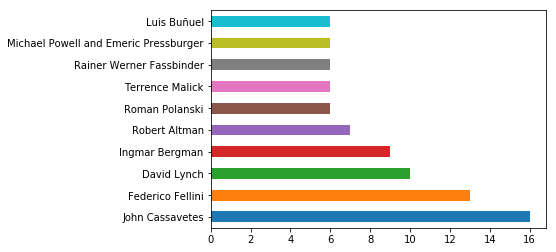

In [4]:
import matplotlib.pyplot as plt

df = pd.read_csv('top10lists.csv')
df.author.value_counts()[0:10].plot(kind='barh', x = 'Frequency of Appearance on Top 10 Lists')

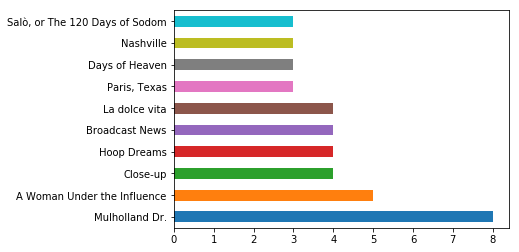

In [5]:
df.title.value_counts()[0:10].plot(kind='barh', x = 'Frequency of Appearance on Top 10 Lists')

## Data Preparation

- Data contain anomalies and artifacts.
- Data driven projects require identifying and addressing these issues.


# Exploratory Data Analysis

- John Tukey’s coined the term “exploratory data analysis” (EDA). 
- Data scientists agree that serious time and effort should be devoted to exploring data to sanity-check its most basic properties, and to expose unexpected features. 
- This type of "detective work" adds crucial insights to every data-driven endeavor.  
- Example: the row mean varied with the date on which each row was collected in genome-wide association studies.

In [6]:
import pandas as pd
d = {'student num': [999777000,999688123 , 999888123], 'mark': [80, 78, '??']}
df = pd.DataFrame(d)
df['mark'].mean()

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [7]:
df
df.dtypes

student num     int64
mark           object
dtype: object

In [8]:
df.iat[2,1] = '91'
df1 = df.astype('int64')
df1.dtypes
df1['mark'].mean()

83.0

In [13]:
# data errors can be harder to find
import numpy as np
np.random.seed(10)

stnum = list(range(999777000,999777100, 1))
grades = np.random.normal(70,10,49).tolist() + list(['?????????']) + np.random.normal(70,10,50).tolist()

data = {'student number': stnum, 'grades': grades}
df1 = pd.DataFrame(data)
print(df1.shape)
df1.head()

(100, 2)


,student number,grades
0,999777000,83.3159
1,999777001,77.1528
2,999777002,54.546
3,999777003,69.9162
4,999777004,76.2134


# Python Tools for Data Science

The main Python programming, libraries, and tools for data analysis are: 

- NumPy
- pandas
- matplotlib
- iPython and Jupyter
- SciPy
- scikit-learn
- statsmodels


# Jupyter Notebooks

- What is a notebook?
- What can I do with a notebook?
- How can a notebook help with reproducible research?

Lots of people like notebooks

![](githubipynbcount.png)

Some people don't

<img src="hptweet.png" height="400" width="600">

[I don't like notebooks - Joel Grus talk at JupyterCon.](https://docs.google.com/presentation/d/1n2RlMdmv1p25Xy5thJUhkKGvjtV-dkAIsUXP-AL4ffI/preview?slide=id.g362da58057_0_1)

[Yihui Xie's response.](https://yihui.name/en/2018/09/notebook-war/#joel-s-complaints-about-notebooks)

# Literate Programming

>Literate programming is a methodology that combines a programming language with a documentation language ... The main idea is to treat a program as a piece of literature, addressed to human beings rather than to a computer. ([Donald Knuth](https://www-cs-faculty.stanford.edu/~knuth/lp.html)) 